In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras import layers, models
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Building a Logistic Regression Model

Remember that a logistic regression model is linear regression where we say everything to the right of $0$ is one class and everything to the left is another, and where we use a sigmoid function (to bound the output appropriately, and provide a smooth, differentiable loss).

Our classification is going to be done using the following equations:

$$
z = \mathbf{w}^\top \mathbf{x} + b \\
y = \sigma(z)
$$

Where the function $\sigma$ is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

## 1.1 Sigmoid Function

Remember, we want to be efficient with our operations. Your function should take in a `numpy.array` and apply this sigmoid function to all of those elements.

In [4]:
# GRADED FUNCTION
def sigmoid(z: np.array) -> np.array:
    '''
    Given an array of real numbers, apply the sigmoid function element-wise.
    Return:
        A numpy array of the same shape as z.
    '''
    
    return 1 / (1 + np.exp(-z))


### 1.1 Test Cases

In [5]:
# This is a simple test, not intended to be comprehensive

x = np.array([0, 1, 2, -1, -2, 0.001, 0.01, 3.1415, -3.1415, 100, -100])
y = sigmoid(x)
t = np.array([5.00000000e-01, 7.31058579e-01, 8.80797078e-01, 2.68941421e-01,
       1.19202922e-01, 5.00250000e-01, 5.02499979e-01, 9.58572489e-01,
       4.14275114e-02, 1.00000000e+00, 3.72007598e-44])

assert np.allclose(y, t, atol=1e-4), "sigmoid(x) didn't work for all numbers in x."

"All tests passed"

'All tests passed'

## 1.2 Forward Direction

We now actually have everything we would need to compute the foward pass of our logistic regression model. Note that this function will perform a matrix multipication to compute the value for each of the individual units.

In [6]:
# GRADED FUNCTION
def log_bin_forward(X: np.array, w: np.array, b: float) -> np.array:
    '''
    logistic regression, binary classification, forward pass.
    Parameters:
        X: (N, D) numpy array
        w: (D, 1) numpy array
        b: float
    Return:
        y: (N, 1) numpy array
    '''

    z = np.dot(X, w) + b
    y = sigmoid(z)

    return y

### 1.2 Test cases

In [7]:
# These are simple tests, not intended to be comprehensive

X = np.array([[1, 2], [3, 4], [5, 6]])
w = np.array([[0.5], [-0.5]])
b = 0.0
t = np.array([[0.37754067], [0.37754067], [0.37754067]])
y = log_bin_forward(X, w, b)
assert np.allclose(y, t, atol=1e-4)

X = np.array([[1, 2], [3, 4], [5, 6]])
w = np.array([[0.0], [0.0]])
b = 0.0
t = np.array([[0.5], [0.5], [0.5]])
y = log_bin_forward(X, w, b)
assert np.allclose(y, t, atol=1e-4)

X = np.array([[1, 1], [2, 2]])
w = np.array([[10], [10]])
b = 5.0
t = np.array([[1.], [1.]])
y = log_bin_forward(X, w, b)
assert np.allclose(y, t, atol=1e-4)

X = np.array([[1, 1], [2, 2]])
w = np.array([[-10], [-10]])
b = -5.0
t = np.array([[1.38879439e-11], [2.86251858e-20]])
y = log_bin_forward(X, w, b)
assert np.allclose(y, t, atol=1e-4)

X = np.array([[0, 0], [0, 0]])
w = np.array([[0.0], [0.0]])
b = 1.0
t = np.array([[0.73105858], [0.73105858]])
y = log_bin_forward(X, w, b)
assert np.allclose(y, t, atol=1e-4)

"All Tests Passed"

'All Tests Passed'

## 1.3 Loss Function

Before we can perform backpropagation for a given set of inputs and weights, we need to decide on a loss function that this gradient will correspond to. Usually, we use cross-entropy loss when performing logistic regression, so let's use that here.

$$
L_{CE}(y, t) = -t \ln (y) - (1-t) \ln(1-y)
$$

In [8]:
# GRADED FUNCTION
def cross_entropy_loss(y: np.array, t: np.array) -> float:
    """
    Compute the cross-entropy loss. Note that since you are provided arrays
    rather than a single points, this is actually the cost function.

    Parameters:
        y: (N, 1) numpy array of predicted probabilities (values between 0 and 1).
        t: (N, 1) numpy array of true labels (0 or 1).

    Returns:
        loss: Cross-entropy loss as a float.
    """
    # We do this to ensure we never hit log(0)
    epsilon = 1e-15
    y = np.clip(y, epsilon, 1 - epsilon)

    # your code here
    loss = -np.mean(t * np.log(y) + (1-t) * np.log(1-y))

    return loss

### 1.3 Test Cases

In [9]:
t = np.array([0, 1, 0, 1])
y = np.array([0.1, 0.9, 0.2, 0.8])
loss = cross_entropy_loss(y, t)
exp = 0.164252033486018
assert np.isclose(loss, exp, atol=10e-4)

t = np.array([0,0,0,0,0,1,1,1,1,1])
y = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
loss = cross_entropy_loss(y, t)
exp = 0.3085156449913465
assert np.isclose(loss, exp, atol=10e-4)

t = np.array([1, 1,1,1,1,1,1,1,1,1,1])
y = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
loss = cross_entropy_loss(y, t)
exp = 3.8600195228886935
assert np.isclose(loss, exp, atol=10e-4)

t = np.array([0,0,0,0,0,0,0,0,0,0,0])
y = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
loss = cross_entropy_loss(y, t)
exp = 3.8600922135641658
assert np.isclose(loss, exp, atol=10e-4)

"All Tests Passed"

'All Tests Passed'

## 1.4 Gradients

Now we have everything we need to find the gradient. To calculate the gradient, we need the derivative of the loss with respect to a particular weight parameter. 

$$
\frac{\partial L_{CE}}{\partial w_j} = (y - t) \cdot x_j
$$

In [10]:
# GRADED FUNCTION
def log_bin_backward(X: np.array, y: np.array, t: np.array, w: np.array, b: float) -> np.array:
    '''
    logistic regression, binary classification, backprop.
    Parameters:
        X: (N, D) numpy array
        y: (N, 1) numpy array
        t: (N, 1) numpy array
        w: (D, 1) numpy array
        b: float
    Return:
        dw: (D, 1) numpy array
        db: float
    '''
    N = X.shape[0]

    dw = np.dot(X.T, (y - t)) / N
    db = np.mean(y - t)

    return dw, db

### 1.4 Test Cases

In [11]:
X = np.array(
    [
        [1.26658442, -1.02050719],
        [-0.98437831, 0.27607749],
        [-1.32136078, -1.26195146],
        [0.49447882, 1.38227184],
        [-1.33470097, -2.00844646],
    ]
)
t = np.array([[1], [0], [0], [1], [0]])

y = np.array([[0.81729993], [0.02683276], [0.00764113], [0.58255813], [0.00593826]])
w = np.array([[2.43169314], [0.29659293]])
b = -1.279109137189912
dw_exp = np.array([[0.09645146], [0.08094658]])
db_exp = 0.11194595724150591

dw, db = log_bin_backward(X, y, t, w, b)

assert np.allclose(-dw, dw_exp, atol=1e-4)
assert np.isclose(-db, db_exp, atol=1e-4)

y = np.array([[0.85441441], [0.02853752], [0.0062232], [0.69070388], [0.00435393]])
w = np.array([[2.60359904], [0.43450242]])
b = -1.0846129735508365
dw_exp = np.array([[0.07589256], [0.05753592]])
db_exp = 0.0831534116965434

dw, db = log_bin_backward(X, y, t, w, b)

assert np.allclose(-dw, dw_exp, atol=1e-4)
assert np.isclose(-db, db_exp, atol=1e-4)


y = np.array([[0.87969946], [0.02963325], [0.00530132], [0.76073603], [0.00343621]])
w = np.array([[2.7415787], [0.53434795]])
b = -0.9375477440982641
dw_exp = np.array([[0.06228867], [0.04267413]])
db_exp = 0.0642387455552448

dw, db = log_bin_backward(X, y, t, w, b)

assert np.allclose(-dw, dw_exp, atol=1e-4)
assert np.isclose(-db, db_exp, atol=1e-4)


y = np.array([[0.89786906], [0.03030304], [0.00464924], [0.80744823], [0.00284379]])
w = np.array([[2.856671], [0.60987594]])
b = -0.8220637356800282
dw_exp = np.array([[0.05286777], [0.03302925]])
db_exp = 0.051377327219592296

dw, db = log_bin_backward(X, y, t, w, b)

assert np.allclose(-dw, dw_exp, atol=1e-4)
assert np.isclose(-db, db_exp, atol=1e-4)

"All Tests Passed"

'All Tests Passed'

## 1.5 Combining Everything

We're now going to combine everything to create a logistic regression model! Remember to use the functions you just wrote, don't just rewrite the details.

In [12]:
# GRADED CLASS
class LogisticRegression():
    def __init__(self):
        self.w = None
        self.b = None

    def fit(self, X: np.array, t: np.array, lr: float, epochs: int):
        # Initialize w and b to random weights
        # I recommend using np.random.randn

        self.w = np.random.randn(X.shape[1], 1)
        self.b = np.random.rand()

        t = t.reshape(-1, 1)
        loss_array = []

        for i in range(epochs):
            # Forward
            y = log_bin_forward(X, self.w, self.b)
            loss = cross_entropy_loss(y, t)
            loss_array.append(loss)

            # Backward
            dw, db = log_bin_backward(X, y, t, self.w, self.b)

            # Update
            self.w = self.w - lr * dw
            self.b = self.b - lr * db

        return loss_array

    def predict(self, X: np.array) -> np.array:

        y = sigmoid(np.dot(X, self.w) + self.b)

        return y


### 1.5 Test Cases

Here we use the model you just created to see how well it performs on a given dataset.

In [13]:
def graph_points(X, y, label="Class"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], color='red', label="Class 1")
    plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], color='blue', label="Class 2")
    plt.title(f'{label}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def graph_loss(loss_array):
    plt.figure(figsize=(8, 6))
    plt.plot(loss_array, label='Loss over epochs', color='green')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


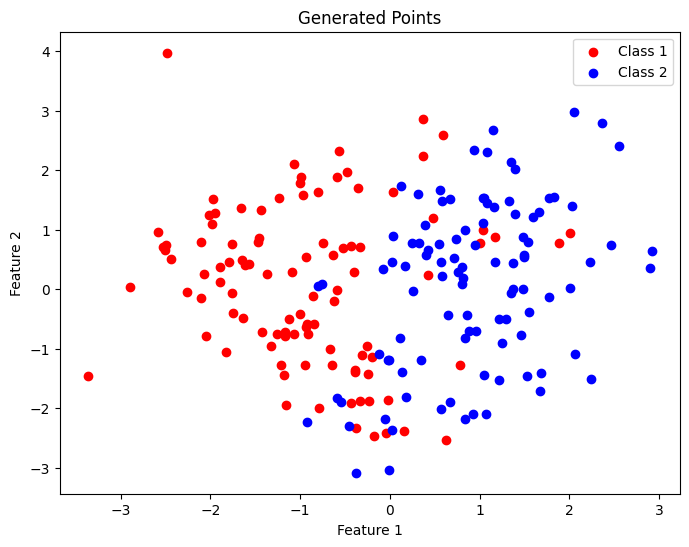

In [14]:
from sklearn.datasets import make_classification

X, t = make_classification(n_samples=200, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
t = t.reshape(-1, 1)

graph_points(X,t, "Generated Points")

In [15]:
model = LogisticRegression()
epochs = 100
learning_rate = 0.1

# Fit the model
loss_array = model.fit(X, t, learning_rate, epochs)

y_pred = model.predict(X) >= 0.5  # Convert probabilities to binary predictions
accuracy = accuracy_score(t, y_pred)
accuracy

0.875

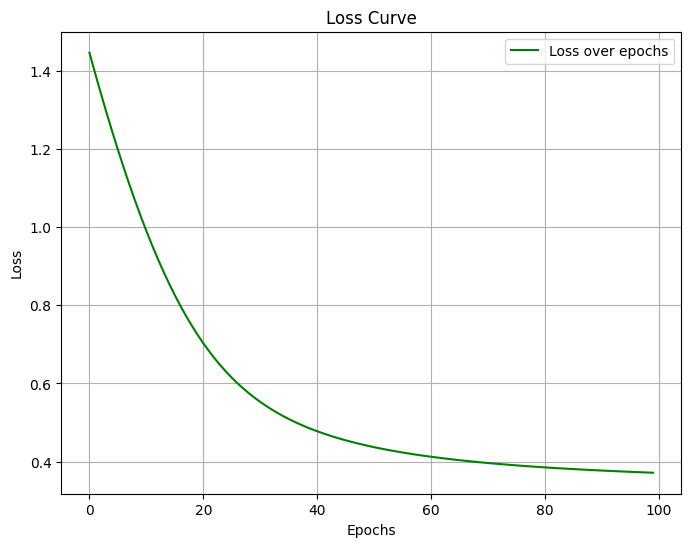

In [16]:
# Plot the loss over epochs
graph_loss(loss_array)

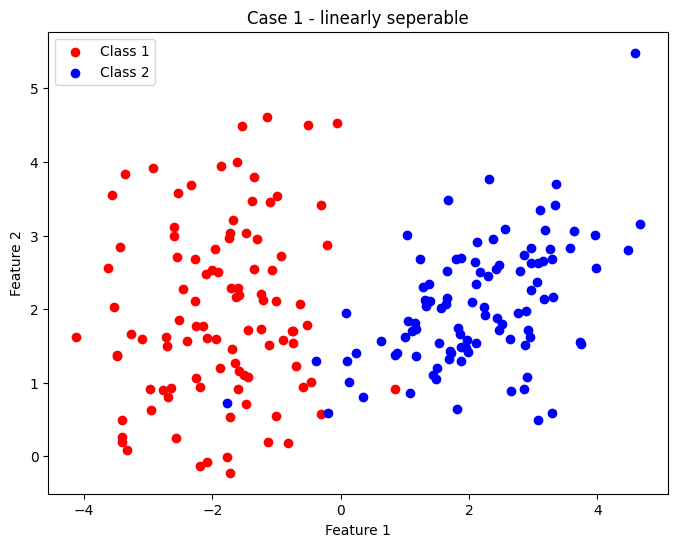

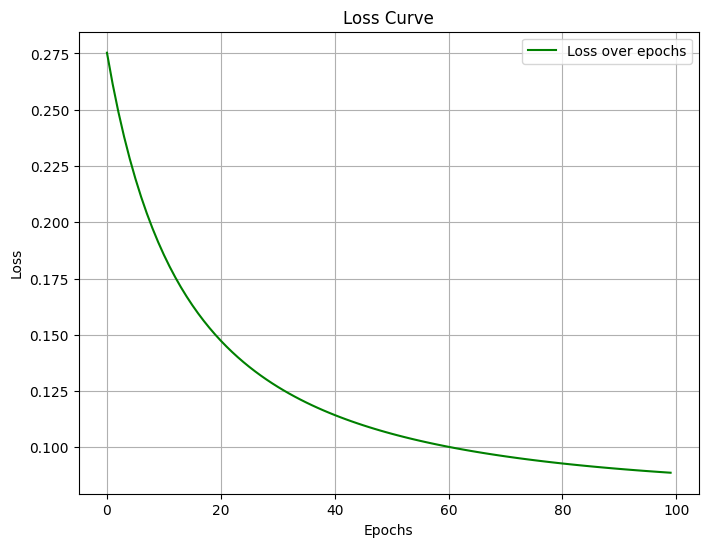

Accuracy: 0.97


In [17]:
# CASE 1 - WORKS WELL

# Generate linearly separable dataset
X, t = make_classification(
    n_samples=200, n_features=2, n_classes=2, n_informative=2, 
    n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42
)

# Visualize the dataset
graph_points(X, t, "Case 1 - linearly seperable")

# Train model
model = LogisticRegression()
epochs = 100
learning_rate = 0.1
loss_array = model.fit(X, t, learning_rate, epochs)

# Graph loss
graph_loss(loss_array)

# Predict and calculate accuracy
y_pred = model.predict(X) >= 0.5
accuracy = accuracy_score(t, y_pred)
print(f"Accuracy: {accuracy}")


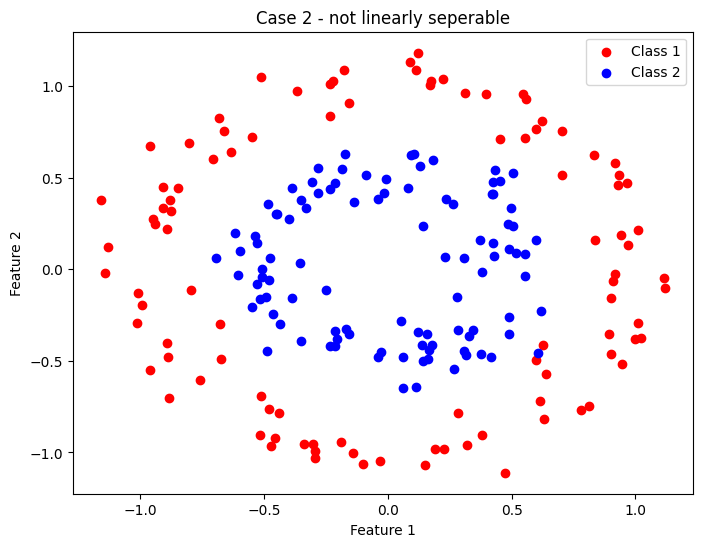

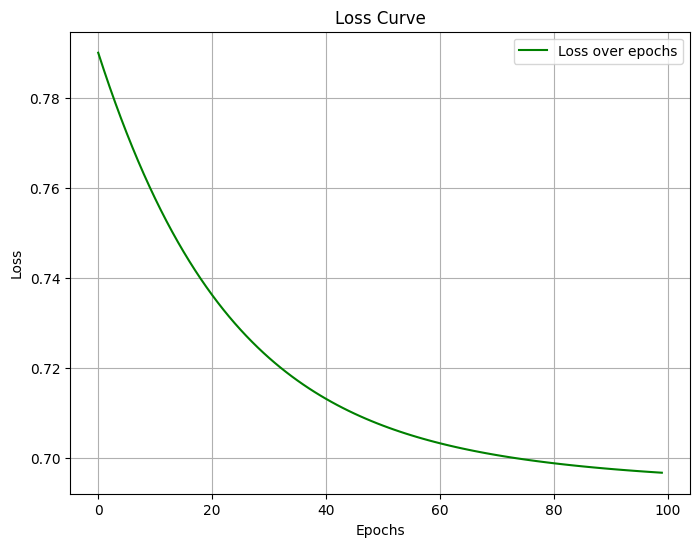

Accuracy: 0.515


In [18]:
#CASE 2 - DOESNT WORK WELL

# Generate non-linearly separable dataset
X, t = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)

# Visualize the dataset
graph_points(X, t, "Case 2 - not linearly seperable")

# Train model
model = LogisticRegression()
epochs = 100
learning_rate = 0.1
loss_array = model.fit(X, t, learning_rate, epochs)

# Graph loss
graph_loss(loss_array)

# Predict and calculate accuracy
y_pred = model.predict(X) >= 0.5
accuracy = accuracy_score(t, y_pred)
print(f"Accuracy: {accuracy}")


# 2. Neural Networks

## 2.1 Activation Functions

In [19]:
# GRADED SECTION

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


def softmax_derivative(x):
    return softmax(x) * (1 - softmax(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

activation_functions = {
    "sigmoid": (sigmoid, sigmoid_derivative),
    "softmax": (softmax, softmax_derivative),
    "relu": (relu, relu_derivative),
    "tanh": (tanh, tanh_derivative),
    "none": (None, None)
}

## 2.2 Building the NN

We want to be able to create neural network in the following way:

```python
layers = [
    Layer(4, "relu"),
    Layer(4, "sigmod"),
    Layer(4, "relu"),
    Layer(2, "softmax")
]

model = NeuralNet(layers)
epochs = 1000
learning_rate = 0.1
loss_array = model.fit(X, t, epochs, learning_rate)
```

In [20]:
class Layer:
    def __init__(self, hidden_nodes: int, activation: str) -> None:
        self.nodes = hidden_nodes
        self.act, self.der = activation_functions[activation]

In [21]:
class NeuralNet:
    def __init__(self, layers: list[Layer]) -> None:
        self.layers = layers
        self.weights = []
        self.biases = []

    def init_weights(self, X):
        """
        Initialize weights and biases for each layer based on input data.

        Parameters:
            X: (N, D) numpy array of input data
        """

        # In between each layer you have a weight matrix and a bias vector.

        # you should initialize the weights using np.random.randn and initalize
        # the biases to either 0 or randn. I've provided a bit of structure to
        # help you out, but if you want to do this differently, you can rewrite
        # the whole method, you don't have to use this structure.

        # Add input layer
        input_layer = Layer(X.shape[1], 'none')
        self.layers.insert(0, input_layer)

        # Initialize random weights and biases in between each of the layers
        for layer_index in range(len(self.layers) - 1):
            left_layer_count = self.layers[layer_index].nodes
            right_layer_count = self.layers[layer_index + 1].nodes

            self.weights.append(np.random.randn(left_layer_count, right_layer_count))
            self.biases.append(np.zeros((1, right_layer_count)))
        
    def one_hot_encode(self, t, num_classes):
        """
        One-hot encode the target variable t.

        Parameters:
            t: (N,) numpy array of class labels
            num_classes: the number of unique classes

        Returns:
            one_hot: (N, num_classes) numpy array where each row is one-hot encoded
        """
        one_hot = np.zeros((t.shape[0], num_classes))
        one_hot[np.arange(t.shape[0]), t] = 1
        return one_hot

    def forward_pass(self, X):
        """
        Perform a forward pass through the network.

        Parameters:
            X: (N, D) numpy array of input data

        Returns:
            y: (N, M) numpy array of network output after the final layer
        """
        a = X
        self.activations = [a]
        self.logits = []

        for layer, W, b in zip(self.layers, self.weights, self.biases):

            z = np.dot(a, W) + b
            
            if layer.act is not None:
                a = layer.act(z)
            else:
                a = z

            self.logits.append(z)
            self.activations.append(a)

        self.y = a
        return self.y

    def backward_pass(self, X, t):
        """
        Perform a backward pass through the network to compute gradients.

        Parameters:
            X: (N, D) numpy array of input data
            t: (N, num_classes) numpy array of one-hot encoded target labels

        Returns:
            w_grads: list of weight gradients for each layer
            b_grads: list of bias gradients for each layer
        """
        N = X.shape[0]

        # Output layer
        delta = self.activations[-1] - t  

        w_grads = []
        b_grads = []

        for i in reversed(range(1, len(self.layers))):
            layer = self.layers[i]
            z = self.logits[i - 1]  
            a = self.activations[i]

            dw = np.dot(self.activations[i - 1].T, delta) / N
            db = np.sum(delta, axis=0, keepdims=True) / N

            w_grads.insert(0, dw)
            b_grads.insert(0, db)

            # Propagate error to the previous layer (if not first hidden layer)
            if i > 1:
                W = self.weights[i - 1] 
                delta = np.dot(delta, W.T) * self.layers[i - 1].der(self.activations[i - 1])

        return w_grads, b_grads


    def update_weights(self, w_grads, b_grads, learning_rate):
        """
        Update the weights and biases of the network using the computed gradients.

        Parameters:
            w_grads: list of weight gradients for each layer
            b_grads: list of bias gradients for each layer
            learning_rate: float, the learning rate for gradient descent
        """
        for i in range(len(self.weights)): 
            dW, db = w_grads[i], b_grads[i]

            self.weights[i] -= learning_rate * dW
            self.biases[i] -= learning_rate * db

    def fit(self, X, t, epochs, learning_rate):
        """
        Train the neural network on the given data.

        Parameters:
            X: (N, D) numpy array of input data
            t: (N,) numpy array of target class labels
            epochs: int, number of training epochs
            learning_rate: float, the learning rate for gradient descent

        Returns:
            loss_array: list of loss values computed at each epoch
        """

        loss_array = []
        t = t.astype(int)  # ensure ints
        t = t.reshape(-1)  # flatten for one-hot-encode function
        num_classes = np.unique(t).size

        # use function from above here.
        t_one_hot = self.one_hot_encode(t, num_classes)

        self.init_weights(X)

        for _ in range(epochs):
           
            y = self.forward_pass(X) 

            w_grads, b_grads = self.backward_pass(X, t_one_hot) 

            self.update_weights(w_grads, b_grads, learning_rate) 

            loss = self.cross_entropy_loss(y, t_one_hot)
            loss_array.append(cross_entropy_loss(y, t_one_hot))

        return loss_array

    def predict(self, X):
        """
        Predict class labels for the given input data.

        Parameters:
            X: (N, D) numpy array of input data

        Returns:
            predictions: (N,) numpy array of predicted class labels
        """

        y_pred = self.forward_pass(X)

        # convert from one-hot back to classes
        return np.argmax(y_pred, axis=1)
    
    def cross_entropy_loss(self, y_pred, y_true):
        """
        Compute the cross-entropy loss.

        Parameters:
            y_pred: (N, M) numpy array of predicted probabilities
            y_true: (N, M) numpy array of one-hot encoded true labels

        Returns:
            loss: float, the cross-entropy loss
        """
        epsilon = 1e-9  # Small value to avoid log(0)
        loss = -np.sum(y_true * np.log(y_pred + epsilon)) / y_true.shape[0]
        return loss

## 2.3 Testing the Model

In [22]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

t = np.array([0, 1, 1, 0])

In [26]:
layers = [
    Layer(4, "relu"),
    Layer(4, "relu"),
    Layer(4, "relu"),
    Layer(2, "softmax")  
]

model = NeuralNet(layers)

epochs = 1000
learning_rate = 0.1
loss_array = model.fit(X, t, epochs, learning_rate)

predictions = model.predict(X)

print("Predictions XOR:", predictions)

Predictions XOR: [0 1 1 0]


In [27]:
accuracy = accuracy_score(t, predictions) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 100.00%


# 3. Neural Network Experiments

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalize values
X_train = X_train / 255
X_test = X_test / 255

NameError: name 'mnist' is not defined

Build a sequential model using `keras.models.Sequential` and add dense layers and experiment with it. Compile and train the model.

In [ ]:
# Building and Training the Model

model = models.Sequential()
model.add(layers.Input((28,28)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8620 - loss: 0.4751 - val_accuracy: 0.9591 - val_loss: 0.1376
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9641 - loss: 0.1223 - val_accuracy: 0.9615 - val_loss: 0.1278
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9746 - loss: 0.0812 - val_accuracy: 0.9692 - val_loss: 0.1042
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9821 - loss: 0.0572 - val_accuracy: 0.9667 - val_loss: 0.1137
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9861 - loss: 0.0427 - val_accuracy: 0.9738 - val_loss: 0.0964
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9896 - loss: 0.0329 - val_accuracy: 0.9687 - val_loss: 0.1116
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9910 - loss: 0.0265 - val_accuracy: 0.9749 - val_loss: 0.1008
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9923 - loss: 0.0219 - 

In [ ]:
# evaluate your model by running the code below
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.9702 - loss: 0.1336
Test score: 0.10887695103883743
Test accuracy: 0.9747999906539917


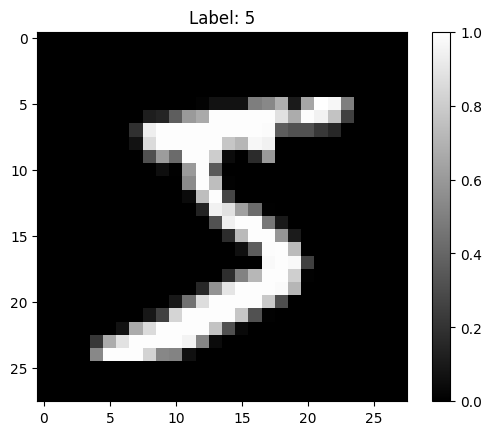

In [ ]:
def display_image(x, y):
    '''
    You can use this function to view the individual images in the dataset.
    '''
    plt.imshow(x, cmap='gray')
    plt.title(f'Label: {y}')
    plt.colorbar()
    plt.show()


display_image(X_train[0], y_train[0])

## 3.1 Separate Validation and Test Sets

As we load the data from the built-in keras function, it splits them into two subsets; however, it is recommended to split the data into three subsets such as:

```
80% train, 10% val, 10% test
```

In [29]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.11, random_state=42)

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 3.2 Experiments

Experimentation with different hyperparameters.

* number of layers
* nodes per hidden layer
* learning rate
* number of epochs

In [30]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # accuracy
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # loss
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Val Loss')
    ax2.set_title('Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.show()

c:\Users\agham\OneDrive\Desktop\Docs\Projects\MLprojects\NN_fromScratch\env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8734 - loss: 0.4462 - val_accuracy: 0.9628 - val_loss: 0.1336
Epoch 2/5
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9621 - loss: 0.1282 - val_accuracy: 0.9736 - val_loss: 0.0862
Epoch 3/5
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9769 - loss: 0.0780 - val_accuracy: 0.9769 - val_loss: 0.0721
Epoch 4/5
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9831 - loss: 0.0555 - val_accuracy: 0.9784 - val_loss: 0.0696
Epoch 5/5
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9867 - loss: 0.0418 - val_accuracy: 0.9781 - val_loss: 0.0711
Training Accuracy: 0.9902
Validation Accuracy: 0.9781
Test Accuracy: 0.9726


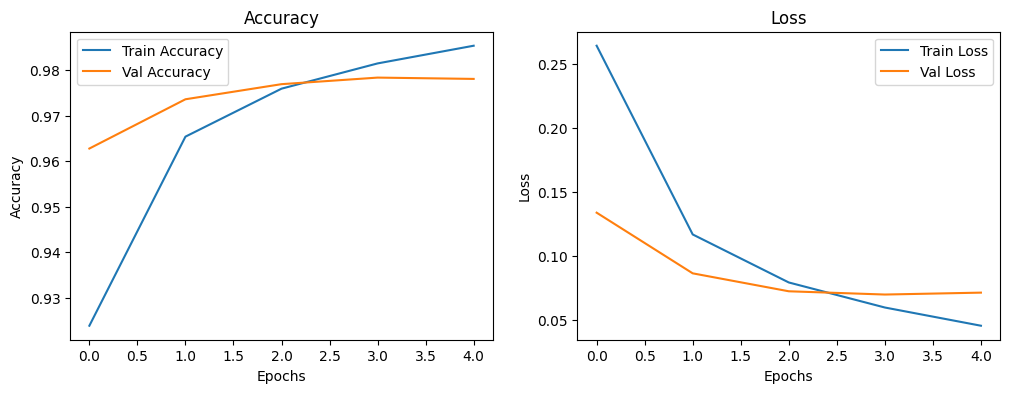

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

plot_history(history1)

Epoch 1/5
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8776 - loss: 0.4242 - val_accuracy: 0.9609 - val_loss: 0.1190
Epoch 2/5
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9694 - loss: 0.0987 - val_accuracy: 0.9742 - val_loss: 0.0886
Epoch 3/5
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9786 - loss: 0.0678 - val_accuracy: 0.9703 - val_loss: 0.0890
Epoch 4/5
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9836 - loss: 0.0488 - val_accuracy: 0.9749 - val_loss: 0.0754
Epoch 5/5
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9886 - loss: 0.0353 - val_accuracy: 0.9781 - val_loss: 0.0672
Training Accuracy: 0.9903
Validation Accuracy: 0.9781
Test Accuracy: 0.9760


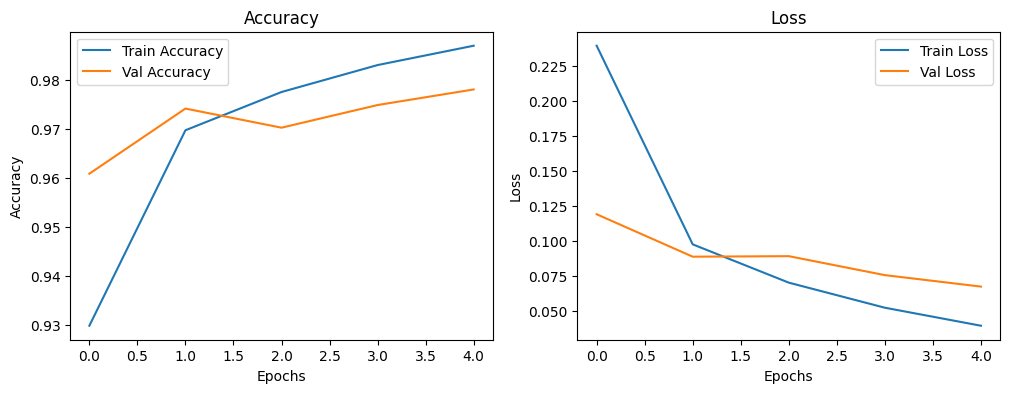

In [32]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

plot_history(history2)

Epoch 1/5
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 2s 696us/step - accuracy: 0.1894 - loss: 2.0564 - val_accuracy: 0.2440 - val_loss: 1.8424
Epoch 2/5
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - accuracy: 0.2494 - loss: 1.8136 - val_accuracy: 0.2786 - val_loss: 1.7656
Epoch 3/5
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.2752 - loss: 1.7524 - val_accuracy: 0.3108 - val_loss: 1.7238
Epoch 4/5
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.3097 - loss: 1.7080 - val_accuracy: 0.3397 - val_loss: 1.6796
Epoch 5/5
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - accuracy: 0.3303 - loss: 1.6563 - val_accuracy: 0.3418 - val_loss: 1.6374
Training Accuracy: 0.3417
Validation Accuracy: 0.3418
Test Accuracy: 0.3473


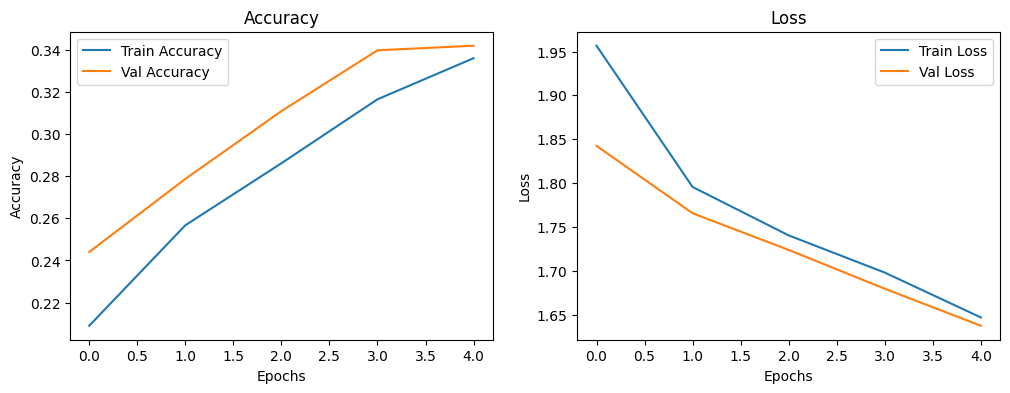

In [33]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history3 = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


plot_history(history3)


# Results Table

| **Experiment** | **Layer Structure** | **Training Accuracy** | **Validation Accuracy** | **Test Accuracy** |
|----------------|---------------------|-----------------------|-------------------------|------------------|
| **Model 1**   | `Flatten` -> `Dense(128, relu)` -> `Dense(10, softmax)` | 0.9899 | 0.9798 | 0.9729 |
| **Model 2**   | `Flatten` -> `Dense(128, relu)` -> `Dense(128, relu)` -> `Dense(10, softmax)` | 0.9895 | 0.9779 | 0.9731 |
| **Model 3**   | `Flatten` -> `Dense(1, relu)` -> `Dense(10, softmax)` | 0.3528 | 0.3463 | 0.3471 |

1. **Model 1**:  
   - A simple model with one hidden layer of 128 nodes.
   - Achieved high training, validation, and test accuracy.

2. **Model 2**:  
   - Added an extra hidden layer with 128 nodes.
   - Slight improvement in performance, but not a significant difference.

3. **Model 3**:  
   - A minimal model with only 1 hidden node.
   - Performed poorly, indicating that the network was underpowered for the task.


# 4. Tuning Generalization

## 4.1 Initial Model

Use the CIFAR-100 dataset (available from Keras)

```python
from keras.datasets import cifar100
(x_train_original, y_train_original), (x_test_original, y_test_original) =
cifar100.load_data(label_mode='fine')
```

In [34]:
from keras.datasets import cifar100

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')
x_train_original, x_test_original = x_train_original / 255.0, x_test_original / 255.0

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


In [35]:
from keras import utils

# Quickly check the shape of input and output
print(x_train_original[0].shape, x_train_original.shape)
print(y_train_original[0], y_train_original.shape)
print(y_train_original[:10].T)

# looks like its a 32x32 image with 3 values for each of
# those pixels (rgb)

# The dataset ( from https://www.cs.toronto.edu/~kriz/cifar.html ) contains
# color images with 100 classes with each class containing 600 images

y_train = utils.to_categorical(y_train_original)
y_test = utils.to_categorical(y_test_original)

(32, 32, 3) (50000, 32, 32, 3)
[19] (50000, 1)
[[19 29  0 11  1 86 90 28 23 31]]


In [36]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  
    Dense(500, activation='sigmoid'), 
    Dense(200, activation='sigmoid'),  
    Dense(100, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_original, y_train, epochs=50, batch_size=64, validation_data=(x_test_original, y_test), verbose=1)

test_loss, test_accuracy = model.evaluate(x_test_original, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.0372 - loss: 4.4127 - val_accuracy: 0.0922 - val_loss: 3.9901
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.0983 - loss: 3.9130 - val_accuracy: 0.1104 - val_loss: 3.8383
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.1276 - loss: 3.7518 - val_accuracy: 0.1352 - val_loss: 3.7318
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1454 - loss: 3.6482 - val_accuracy: 0.1491 - val_loss: 3.6586
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1576 - loss: 3.5718 - val_accuracy: 0.1574 - val_loss: 3.6071
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1676 - loss: 3.5217 - val_accuracy: 0.1698 - val_loss: 3.5471
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.1716 - loss: 3.4871 - val_accuracy: 0.1685 - val_loss: 3.5422
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.1810 - loss: 3.4333 - 

## 4.2 Average Precision based on Hidden Nodes

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step
Nodes: 50, Train Acc: 0.1825, Test Acc: 0.1639
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step
Nodes: 100, Train Acc: 0.2100, Test Acc: 0.1865
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step
Nodes: 200, Train Acc: 0.2190, Test Acc: 0.1928
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Nodes: 300, Train Acc: 0.2249, Test Acc: 0.1959
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Nodes: 500, Train Acc: 0.2253, Test Acc: 0.1957


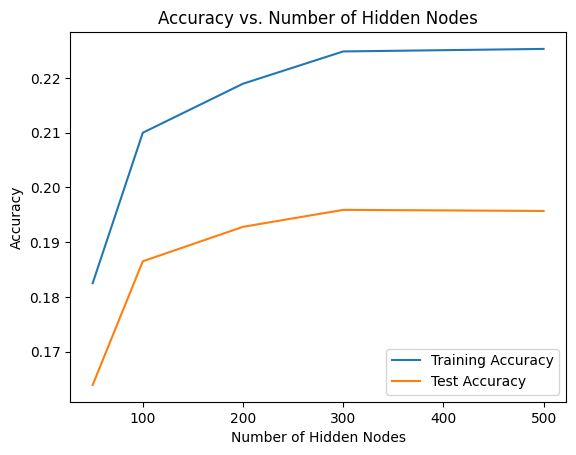

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from sklearn.metrics import accuracy_score
import numpy as np


def build_and_train_model(hidden_nodes):
    model = Sequential([
        Input(shape=(32, 32, 3)), 
        Flatten(),
        Dense(hidden_nodes, activation='sigmoid'), 
        Dense(100, activation='softmax')  
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train_original, y_train, epochs=10, batch_size=64, verbose=0)

    train_predictions = model.predict(x_train_original)
    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_predictions, axis=1))

    test_predictions = model.predict(x_test_original)
    test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_predictions, axis=1))

    return train_accuracy, test_accuracy

hidden_nodes_list = [50, 100, 200, 300, 500]
train_accuracies = []
test_accuracies = []

for nodes in hidden_nodes_list:
    train_acc, test_acc = build_and_train_model(nodes)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    print(f"Nodes: {nodes}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

plt.plot(hidden_nodes_list, train_accuracies, label='Training Accuracy')
plt.plot(hidden_nodes_list, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Hidden Nodes')
plt.legend()
plt.show()